In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pint import UnitRegistry
from pint_pandas import PintType, PintArray

# Test of Thermocouple Circuits

This notebook looks at comparing the temperature profiles of two thermocouple layouts. The first layout has the hot junction of the alumel-chromel wires at the back of the oven. The second layout has hot junction of the alumel-chromel wires at a short distance from the oven, where one of the wires extends to make contact with the oven.

In [17]:
ureg= UnitRegistry()
Q_ = ureg.Quantity

The first few tests used a clamp meter instead of a multimeter to readout the current from the power supply; however, the readout was susceptible to residual fields. Therefore, the first few tests are to be disregarded.

In [18]:
#Amperage read using clamp meter
amps_no_units = np.array([0,1,2,3,4,5,6,7,8,9,10])
amps = amps_no_units * ureg.ampere
room_temp = 25.0

#These were taken in Vacuum at pressure < e-6 torr
temps_no_block_no_units_1 = np.array([25, 57.5, 141.1, 297.2, 
                                      444.7, 565.6, 696.0,
                                      805.6, 919.7, 1012.2, 1046])

temps_no_block_no_units_1 -= room_temp
temps_no_block_1 = np.round(temps_no_block_no_units_1 * ureg.degC,1)

temps_block_no_units_1 = np.array([25, 91.6, 202.9, 305.7,
                                   379.0, 434.4, 482.8,
                                   520.7, 539.7, 565.2, 583.3])

temps_block_no_units_1 -= room_temp
temps_block_1 = np.round(temps_block_no_units_1 * ureg.degC, 1)

# These results were done using a Clamp Meter instead of a Multimeter and are inaccurate

In [19]:
thermocouple_dict = {'Amperage':pd.Series(amps, dtype = PintType(ureg.ampere)), 
    'Temperature (Circ 1 w/o Block)':pd.Series(temps_no_block_1, dtype = PintType(ureg.degC)),
    'Temperature (Circ 1 w/ Block)':pd.Series(temps_block_1, dtype= PintType(ureg.degC)),
    }

pd_thermocouple_1 = pd.DataFrame(thermocouple_dict)
pd_thermocouple_1

,Amperage,Temperature (Circ 1 w/o Block),Temperature (Circ 1 w/ Block)
0,0.0,0.0,0.0
1,1.0,32.5,66.6
2,2.0,116.1,177.9
3,3.0,272.2,280.7
4,4.0,419.7,354.0
5,5.0,540.6,409.4
6,6.0,671.0,457.8
7,7.0,780.6,495.7
8,8.0,894.7,514.7
9,9.0,987.2,540.2


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


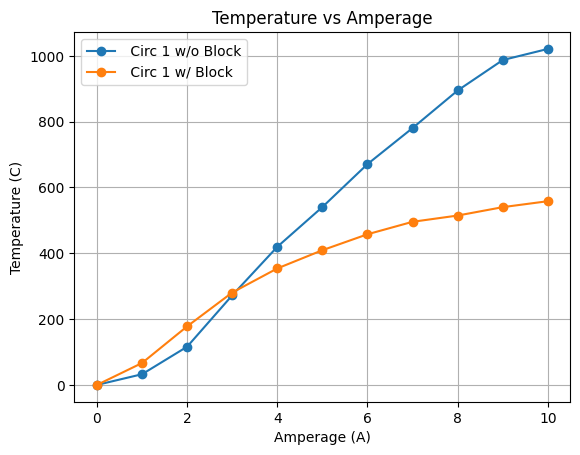

In [20]:
plt.figure()
plt.plot(amps, temps_no_block_1, marker='o', linestyle='-', label = ' Circ 1 w/o Block')
plt.plot(amps, temps_block_1, marker='o', linestyle='-', label = ' Circ 1 w/ Block')
plt.xlabel('Amperage (A)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Amperage')
plt.grid()
plt.legend()
plt.show()

# Tests on Thermocouple Readings using Isothermal Blocks (Using Multimeter, Circuit Layout 1)

This test uses an isothermal block (extended copper wire wrapped around the copper feedthroughs) to ensure that there are no residual currents created from the transition from chromel/alumel to copper and back to chromel/alumel. However, as both copper feedthroughs were exposed to atomsphere, their temperature can be regarded as constant. Therefore, any residual currents would be equal and opposite, not interfering with the readout current. Thus, the isothermal blocks had no effect in the results. This is also the first test to use a multimeter, giving accurate current readings.

In [21]:
temps_no_block_no_units_2 = np.array([25, 50.6, 135.8, 243.5, 326.7, 393.6, 437.7, 500.2, 534.0, 554.7, 573.5])
temps_no_block_no_units_2 -= room_temp
temps_no_block_2 = np.round(temps_no_block_no_units_2 * ureg.degC, 1)

temps_no_block_no_units_3 = np.array([25, 53.3, 134.5, 237.6, 320.8, 376.3, 442.3, 472.0, 508.1, 525.7, 568.8 ])
temps_no_block_no_units_3 -= room_temp
temps_no_block_3 = np.round(temps_no_block_no_units_3 * ureg.degC, 1)

temps_block_no_units_2 = np.array([25, 50.1, 136.4, 235.2, 320.6, 377.3, 432.1, 482.5, 501.1, 541.9, 560.3])
temps_block_no_units_2 -= room_temp
temps_blocks_2 = np.round(temps_block_no_units_2 * ureg.degC, 1)

temps_block_no_units_3 = np.array([25, 51.2, 137.5, 241.1, 320.9, 384.4, 432.7, 459.6, 498.1, 553.1, 552.7])
temps_block_no_units_3 -= room_temp
temps_block_3 = np.round(temps_block_no_units_3 * ureg.degC, 1)


circ1_dict = {'Amperage': pd.Series(amps, dtype = PintType(ureg.ampere)),'No Block 2': pd.Series(temps_no_block_2, dtype = PintType(ureg.degC)), 'No Block 3': pd.Series(temps_no_block_3, dtype = PintType(ureg.degC)),
    'Block 2': pd.Series(temps_blocks_2, dtype = PintType(ureg.degC)), 'Block 3': pd.Series(temps_block_3, dtype = PintType(ureg.degC))}

pd_thermocouple_circ1 = pd.DataFrame(circ1_dict)
pd_thermocouple_circ1

,Amperage,No Block 2,No Block 3,Block 2,Block 3
0,0.0,0.0,0.0,0.0,0.0
1,1.0,25.6,28.3,25.1,26.2
2,2.0,110.8,109.5,111.4,112.5
3,3.0,218.5,212.6,210.2,216.1
4,4.0,301.7,295.8,295.6,295.9
5,5.0,368.6,351.3,352.3,359.4
6,6.0,412.7,417.3,407.1,407.7
7,7.0,475.2,447.0,457.5,434.6
8,8.0,509.0,483.1,476.1,473.1
9,9.0,529.7,500.7,516.9,528.1


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


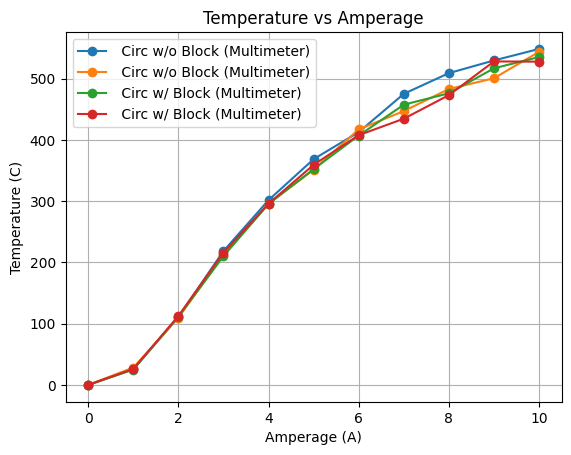

In [22]:
plt.figure()
#plt.plot(amps, temps_no_block_1, marker='o', linestyle='-', label = ' Circ 1 w/o Block (Clamp Meter)')
#plt.plot(amps, temps_block_1, marker='o', linestyle='-', label = ' Circ 1 w/ Block (Clamp Meter)')
plt.plot(amps, temps_no_block_2, marker='o', linestyle='-', label = ' Circ w/o Block (Multimeter)')
plt.plot(amps, temps_no_block_3, marker='o', linestyle='-', label = ' Circ w/o Block (Multimeter)')
plt.plot(amps, temps_blocks_2, marker='o', linestyle='-', label = ' Circ w/ Block (Multimeter)')
plt.plot(amps, temps_block_3, marker='o', linestyle='-', label = ' Circ w/ Block (Multimeter)')
plt.xlabel('Amperage (A)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Amperage')
plt.grid()
plt.legend()
plt.show()

# Tests on Thermocouple Readings with Circuit Layout 2 (No Isothermal Blocks)

In [23]:
#Instead of room temperature, due to baking in the adjacent system the ambient temperature was ~42.7 C
bake_room_temp = 42.7

temps_circ2_no_units = np.array([42.7, 75.6, 159.9, 254.6, 351.5, 425.3, 490.8, 546.6, 598.2, 646.6, 686.4])
temps_circ2_no_units -= bake_room_temp
temps_circ2 = np.round(temps_circ2_no_units * ureg.degC, 1)

temps_circ2_no_units_2 = np.array([42.7, 76.9, 167.7, 257.7, 343.2, 414.8, 479.1, 539.2, 592.5, 637.1, 688.3])
temps_circ2_no_units_2 -= bake_room_temp
temps_circ2_2 = np.round(temps_circ2_no_units_2 * ureg.degC, 1)

temps_circ2_no_units_3 = np.array([42.7, 75.8, 158.8, 254.8, 342.5, 411.0, 476.4, 534.8, 591.1, 640.7, 676.2])
temps_circ2_no_units_3 -= bake_room_temp
temps_circ2_3 = np.round(temps_circ2_no_units_3 * ureg.degC, 1)

circ2_dict = {'Amperage': pd.Series(amps, dtype = PintType(ureg.ampere)), 'Circ 2 1st Run': pd.Series(temps_circ2, dtype = PintType(ureg.degC)), 
              'Circ 2 2nd Run': pd.Series(temps_circ2_2, dtype = PintType(ureg.degC)), 'Circ 2 3rd Run': pd.Series(temps_circ2_3, dtype = PintType(ureg.degC))}

pd_thermocouple_circ2 = pd.DataFrame(circ2_dict)
pd_thermocouple_circ2

,Amperage,Circ 2 1st Run,Circ 2 2nd Run,Circ 2 3rd Run
0,0.0,0.0,0.0,0.0
1,1.0,32.9,34.2,33.1
2,2.0,117.2,125.0,116.1
3,3.0,211.9,215.0,212.1
4,4.0,308.8,300.5,299.8
5,5.0,382.6,372.1,368.3
6,6.0,448.1,436.4,433.7
7,7.0,503.9,496.5,492.1
8,8.0,555.5,549.8,548.4
9,9.0,603.9,594.4,598.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib/cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


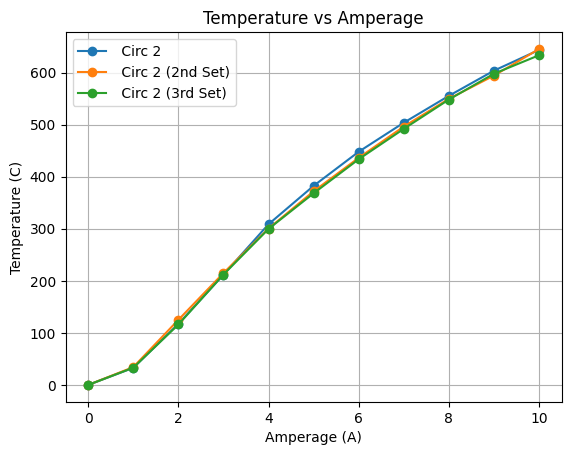

In [24]:
plt.figure()
plt.plot(amps, temps_circ2, marker='o', linestyle='-', label = ' Circ 2')
plt.plot(amps, temps_circ2_2, marker='o', linestyle='-', label = ' Circ 2 (2nd Set)')
plt.plot(amps, temps_circ2_3, marker='o', linestyle='-', label = ' Circ 2 (3rd Set)')
plt.xlabel('Amperage (A)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Amperage')
plt.grid()
plt.legend()
plt.show()

In [25]:
stacked_array = np.stack([temps_block_no_units_2, temps_block_no_units_3, temps_block_no_units_2, temps_block_no_units_3])
circ1_average = np.round(np.mean(stacked_array, axis=0),1)
circ1_std = np.std(stacked_array, axis=0)
circ1_average
np.save('circ1.npy', circ1_average)

stacked_array = np.stack([temps_circ2_no_units, temps_circ2_no_units_2, temps_circ2_no_units_3])
circ2_average = np.round(np.mean(stacked_array, axis=0),1 )
circ2_std = np.std(stacked_array, axis=0)
circ2_average
np.save('circ2.npy', circ2_average)

circ_averages = {'Amperage': pd.Series(amps, dtype = PintType(ureg.ampere)),'Circ 1': pd.Series(circ1_average, dtype = PintType(ureg.degC)), 'Circ 2': pd.Series(circ2_average, dtype = PintType(ureg.degC))}
pd_circ_averages = pd.DataFrame(circ_averages)
pd_circ_averages

,Amperage,Circ 1,Circ 2
0,0.0,0.0,0.0
1,1.0,25.6,33.4
2,2.0,112.0,119.4
3,3.0,213.2,213.0
4,4.0,295.8,303.0
5,5.0,355.8,374.3
6,6.0,407.4,439.4
7,7.0,446.0,497.5
8,8.0,474.6,551.2
9,9.0,522.5,598.8


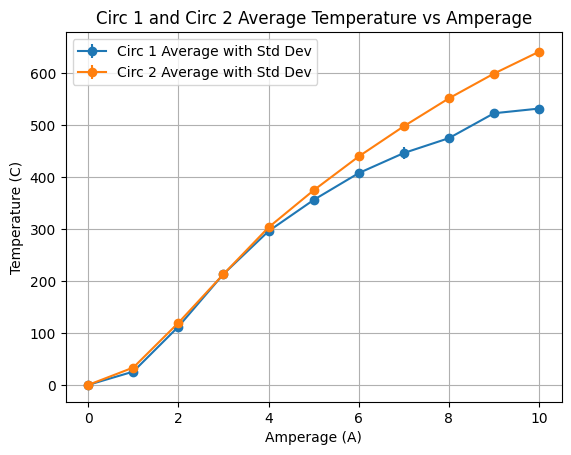

In [26]:
plt.figure()
plt.errorbar(range(len(circ1_average)), circ1_average, yerr=circ1_std, fmt='o-', label='Circ 1 Average with Std Dev')
plt.errorbar(range(len(circ2_average)), circ2_average, yerr=circ2_std, fmt='o-', label='Circ 2 Average with Std Dev')
plt.xlabel('Amperage (A)')
plt.ylabel('Temperature (C)')
plt.title('Circ 1 and Circ 2 Average Temperature vs Amperage')
plt.grid()
plt.legend()
plt.show()